In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [4]:
# Read the data
train = pd.read_csv("ClassificationDataTrain.csv")
test = pd.read_csv("ClassificationDataTest.csv")

Observe the data 

In [5]:
print("Training data shape:",train.shape)
print("Testing data shape:" ,test.shape)

Training data shape: (8000, 7)
Testing data shape: (2000, 7)


In [6]:
train.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,1,1,-1.134630,4,1,1.117674,8
1,1,1,0.764557,4,1,1.122413,8
2,1,1,0.570710,3,0,0.678907,9
3,1,0,-1.351694,4,0,0.032596,10
4,1,1,-2.029885,2,0,1.519348,9


In [7]:
test.head(5)

,Y,X1,X2,X3,X4,X5,X6
0,1,1,-0.382392,3,1,1.485453,10
1,1,1,1.701467,3,1,1.068900,9
2,1,1,-0.335157,4,0,1.422828,8
3,1,1,-0.982258,4,1,1.647780,7
4,1,1,0.750323,4,0,1.677255,7


In [8]:
train_x = train.drop(['Y'], axis=1)
test_x = test.drop(['Y'], axis=1)
train_x= sm.add_constant(train_x )
test_x= sm.add_constant(test_x )

In [11]:
X_train = train_x
Y_train = train['Y']
X_test = test_x
Y_test = test['Y']

Fitting the model

In [12]:
link=sm.families.links.logit()
glm_model = sm.GLM(Y_train, X_train, family=sm.families.Binomial(link=link))
glm_results = glm_model.fit()

In [13]:
y_predictions = glm_results.predict(X_test)
accuracy = accuracy_score(Y_test, y_predictions.round())
print("Accuracy:", accuracy)

Accuracy: 0.482


In [14]:
print(y_predictions)

0       0.502140
1       0.507615
2       0.500543
3       0.512606
4       0.511609
          ...   
1995    0.507124
1996    0.491187
1997    0.492734
1998    0.510794
1999    0.506742
Length: 2000, dtype: float64


# Using Confusion Matrix, to Predict the correct predictions

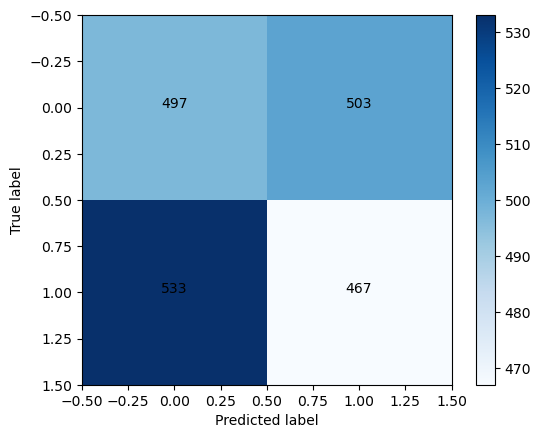

In [15]:
cm = confusion_matrix(Y_test, y_predictions.round())
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "white")

plt.show()

In [16]:
correct_predictions = sum(y_predictions.round() == Y_test)
print("Correctly predicted:", correct_predictions)
print("Total observations in test set:", len(Y_test))

Correctly predicted: 964
Total observations in test set: 2000


# K-Nearest Neighbor Classification Model

In [18]:
np.random.seed(1)

Knn = KNeighborsClassifier (n_neighbors = 3)
Knn.fit (X_train, Y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
preds = Knn.predict(X_test)
correct_predictions = sum(preds.round() == Y_test)
print("Correctly predicted:", correct_predictions)
correct_predictions = metrics.accuracy_score(Y_test, preds)
print("Accuracy:", correct_predictions)

Correctly predicted: 1922
Accuracy: 0.961


c:\Users\Getrude\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [20]:
confusion_matrix = metrics.confusion_matrix(Y_test, preds)
print(confusion_matrix)

[[963  37]
 [ 41 959]]


# Based on the results which of the two models would you recommend

1. K-Nearest Neighbor 
Since it has an accuracy of 0.961 and 1922 correctly predicted variables. 